### Import libraries

In [18]:
import numpy as np
import pandas as pd
import os
import cv2
import random
import unittest

import matplotlib.pyplot as plt

from numpy import save
from imgaug import augmenters as iaa

### Load data

In [19]:
classes = []


def data_loading():
    total_classes = 0
    data_dir_train = r"C:\Users\Desktop\Desktop\JuPyter Notebooks\data\Roadsigns\Train"
    data_dir_test = r"C:\Users\Desktop\Desktop\JuPyter Notebooks\data\Roadsigns\Test"
    for dirs in os.walk(data_dir_train):
        total_classes += 1
    total_classes -= 1  # excluding because parent directory
    classes = os.listdir(data_dir_train)
    classes = np.array(classes, dtype=float)
    classes.sort()
    classes = np.array(classes, dtype=int)
    classes = np.array(classes, dtype=str)
    string_class_labels = classes
    return classes, data_dir_train, data_dir_test, string_class_labels

In [20]:
classes, data_dir_train, data_dir_test, string_class_labels = data_loading()

### Data distribution

In [21]:
def check_distribution(classes):
    class_distribution_dict = dict.fromkeys(classes, 0)
    for clas in classes:
        path = os.path.join(data_dir_train, clas)
        for image in os.listdir(path):
            class_distribution_dict[clas] += 1
    return class_distribution_dict

In [22]:
dct = check_distribution(classes)

In [23]:
def plot_distribution(dct):
    plt.bar(range(len(dct)), list(dct.values()), align="center")
    plt.xticks(range(len(dct)), list(dct.keys()), rotation=90, fontsize=7)
    plt.show()

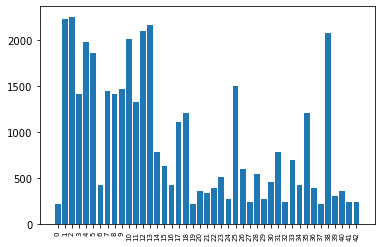

In [24]:
plot_distribution(dct)

### Visualize

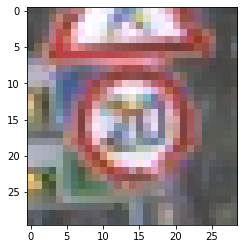

In [25]:
for clas in classes:
    path = os.path.join(data_dir_train, clas)
    for image in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, image))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

In [26]:
img_size = 32
new_array = cv2.resize(img_array, (img_size, img_size))

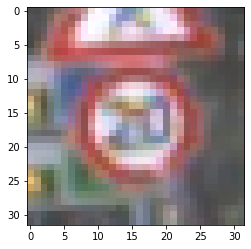

In [27]:
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

### Create train and test set

In [ ]:
training_data = []


def create_training_data():
    for clas in classes:
        path = os.path.join(data_dir_train, clas)
        num_categories = classes[int(clas)]
        for image in os.listdir(path):
            try:
                img_array = cv2.imread(
                    os.path.join(path, image)
                )  # reading in bgr format
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, int(num_categories)])
            except Exception as e:
                pass
    return training_data


create_training_data()

In [ ]:
test_data = []


def create_test_data():
    test_set = pd.read_csv(data_dir_test + ".csv", usecols=["ClassId", "Path"])
    test_set_dict = test_set.set_index("Path")["ClassId"].to_dict()
    labels = test_set["ClassId"].values
    imgs = test_set["Path"].values
    for img in imgs:
        try:
            image_test_array = cv2.imread(os.path.join(data_dir_test, img[5:]))
            new_test_array = cv2.resize(image_test_array, (img_size, img_size))
            test_data.append([new_test_array, test_set_dict[img]])
            # test_data.append(np.array(new_test_array))
        except Exception as e:
            pass
    return test_data


create_test_data()

In [30]:
def data_prep(train, test):
    # for training set
    random.shuffle(train)
    X_train = []
    Y_train = []
    for features, label in train:
        X_train.append(features)
        Y_train.append(label)

    X_train = np.array(X_train).reshape(-1, img_size, img_size, 3)
    X_train = X_train / 255.0

    # for test set
    random.shuffle(test)
    X_test = []
    Y_test = []
    for features, label in test:
        X_test.append(features)
        Y_test.append(label)

    X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)
    X_test = X_test / 255.0

    return X_train, Y_train, X_test, Y_test

In [31]:
X_train, Y_train, X_test, Y_test = data_prep(training_data, test_data)

### Save data

In [32]:
def save_data():
    save("X_GTS_train_copy.npy", X_train)
    save("Y_GTS_train_copy.npy", Y_train)
    save("X_GTS_test_copy.npy", X_test)
    save("Y_GTS_test_copy.npy", Y_test)
    save("Class_labels_copy.npy", string_class_labels)

### Unit Test

In [33]:
class Test(unittest.TestCase):
    def test_data_shape(self):
        new_array_shape = (img_size, img_size, 3)
        X_train_shape = (len(training_data), img_size, img_size, 3)
        X_test_shape = (len(test_data), img_size, img_size, 3)

        self.assertEqual(X_train_shape, X_train.shape)
        self.assertEqual(X_test_shape, X_test.shape)

    def test_minmax_pixelvalue(self):
        self.assertLessEqual([1.0, 1.0], [np.max(X_train), np.max(X_test)])
        self.assertGreaterEqual([0.0, 0.0], [np.min(X_train), np.min(X_test)])


if __name__ == "__main__":
    unittest.main(argv=["first-arg-is-ignored"], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.128s

OK


In [34]:
save_data()